# In Depth A/B Testing - Lab

## Introduction

In this lab, you'll explore a survey from Kaggle regarding budding data scientists. With this, you'll form some initial hypotheses, and test them using the tools you've acquired to date. 

## Objectives

You will be able to:
* Conduct t-tests and an ANOVA on a real-world dataset and interpret the results

## Load the Dataset and Perform a Brief Exploration

The data is stored in a file called **multipleChoiceResponses_cleaned.csv**. Feel free to check out the original dataset referenced at the bottom of this lab, although this cleaned version will undoubtedly be easier to work with. Additionally, meta-data regarding the questions is stored in a file name **schema.csv**. Load in the data itself as a Pandas DataFrame, and take a moment to briefly get acquainted with it.

> Note: If you can't get the file to load properly, try changing the encoding format as in `encoding='latin1'`

In [2]:
#Your code here
import pandas as pd
df = pd.read_csv('multipleChoiceResponses_cleaned.csv', encoding = 'latin1')

/opt/conda/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, resul

In [3]:
df.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity,exchangeRate,AdjustedCompensation
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,NaN,NaN
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,250000.0
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26394 entries, 0 to 26393
Columns: 230 entries, GenderSelect to AdjustedCompensation
dtypes: float64(15), object(215)
memory usage: 46.3+ MB


In [5]:
df.LearningDataScience.value_counts()

Yes, I'm focused on learning mostly data science skills                                                                          800
Yes, but data science is a small part of what I'm focused on learning                                                            429
No, I am not focused on learning data science skills                                                                              55
Sometimes                                                                                                                         11
Rarely                                                                                                                             5
Never                                                                                                                              5
Bitbucket                                                                                                                          4
Other                                                                

In [6]:
df.describe()

,LearningCategorySelftTaught,LearningCategoryOnlineCourses,LearningCategoryWork,LearningCategoryUniversity,LearningCategoryKaggle,LearningCategoryOther,TimeGatheringData,TimeModelBuilding,TimeProduction,TimeVisualizing,TimeFindingInsights,TimeOtherSelect,CompensationAmount,exchangeRate,AdjustedCompensation
count,16236.000000,16253.000000,16238.000000,16249.000000,16253.000000,16221.000000,10657.000000,10655.000000,10644.000000,10656.000000,10650.000000,10640.000000,5.178000e+03,4499.000000,4.343000e+03
mean,33.596945,25.814680,13.760184,21.133270,4.467212,1.449728,35.680304,27.455279,10.007657,13.639968,9.249953,2.254041,4.129494e+07,0.703416,6.636071e+06
std,23.781350,24.558786,17.845975,23.784604,10.186693,8.437395,19.364950,17.450835,10.458430,9.947624,12.429025,10.302431,1.965335e+09,0.486681,4.293996e+08
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.900000e+01,0.000030,-7.351631e+01
25%,20.000000,10.000000,0.000000,0.000000,0.000000,0.000000,25.000000,15.000000,5.000000,10.000000,0.000000,0.000000,5.000000e+04,0.058444,2.036942e+04
50%,30.000000,20.000000,10.000000,15.000000,0.000000,0.000000,30.000000,30.000000,10.000000,10.000000,5.000000,0.000000,9.000000e+04,1.000000,5.381217e+04
75%,50.000000,35.000000,20.000000,40.000000,5.000000,0.000000,50.000000,40.000000,10.000000,15.000000,15.000000,0.000000,1.900000e+05,1.000000,9.566608e+04
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,303.000000,100.000000,1.000000e+11,2.652053,2.829740e+10


In [7]:
df.FormalEducation.value_counts()

Master's degree                                                      8204
Bachelor's degree                                                    4811
Doctoral degree                                                      3543
Some college/university study without earning a bachelor's degree     786
Professional degree                                                   451
I did not complete any formal education past high school              257
I prefer not to answer                                                 90
Name: FormalEducation, dtype: int64

In [8]:
import seaborn as sns
sns.jointplot(df.FormalEducation, df.AdjustedCompensation)

TypeError: can't multiply sequence by non-int of type 'float'

## Wages and Education

You've been asked to determine whether education is impactful to salary. Develop a hypothesis test to compare the salaries of those with Master's degrees to those with Bachelor's degrees. Are the two statistically different according to your results?

> Note: The relevant features are stored in the 'FormalEducation' and 'AdjustedCompensation' features.

You may import the functions stored in the `flatiron_stats.py` file to help perform your hypothesis tests. It contains the stats functions that you previously coded: `welch_t(a,b)`, `welch_df(a, b)`, and `p_value(a, b, two_sided=False)`. 

Note that `scipy.stats.ttest_ind(a, b, equal_var=False)` performs a two-sided Welch's t-test and that p-values derived from two-sided tests are two times the p-values derived from one-sided tests. See the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) for more information.    

In [9]:
#Your code here
df.groupby('FormalEducation').mean()

,LearningCategorySelftTaught,LearningCategoryOnlineCourses,LearningCategoryWork,LearningCategoryUniversity,LearningCategoryKaggle,LearningCategoryOther,TimeGatheringData,TimeModelBuilding,TimeProduction,TimeVisualizing,TimeFindingInsights,TimeOtherSelect,CompensationAmount,exchangeRate,AdjustedCompensation
FormalEducation,,,,,,,,,,,,,,,
Bachelor's degree,33.279950,32.734387,13.034999,13.211728,5.689953,2.348106,37.008338,19.425704,10.764476,14.404117,12.889034,2.256531,2.317539e+06,0.566872,6.488710e+04
Doctoral degree,42.439163,15.578385,19.627744,18.509070,2.951726,1.000293,40.167837,26.860204,8.204146,11.948894,7.717773,3.869504,1.811699e+08,0.854067,2.956618e+07
I did not complete any formal education past high school,41.195489,32.706767,9.383459,6.488722,7.533835,2.691729,36.700000,22.440000,9.520000,13.040000,13.300000,5.000000,2.256400e+05,0.713513,5.931777e+04
I prefer not to answer,50.794118,20.352941,9.882353,11.235294,5.235294,2.575758,29.250000,25.250000,9.550000,20.200000,9.000000,1.750000,2.348244e+06,0.700556,2.228557e+05
Master's degree,29.285930,25.846295,11.838749,27.935217,4.324314,0.996465,32.760306,31.227620,10.572870,14.278773,8.434783,1.327918,2.816134e+06,0.715765,6.913990e+04
Professional degree,33.106436,33.163366,14.752475,11.650990,5.465594,2.356188,37.482456,20.559471,12.087719,13.653509,12.364035,1.982379,1.890105e+06,0.586597,6.120670e+04
Some college/university study without earning a bachelor's degree,38.246018,31.364362,10.315603,12.980496,4.779255,2.441071,35.640553,22.165899,10.949309,13.188940,12.493088,3.764977,7.001344e+05,0.657964,8.291218e+04


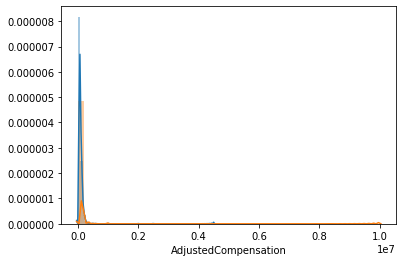

In [10]:
subset = df[(~df['FormalEducation'].isnull()) & (~df['AdjustedCompensation'].isnull())]

s1 = subset[subset['FormalEducation']=="Master's degree"]["AdjustedCompensation"]
s2 = subset[subset['FormalEducation']=="Bachelor's degree"]["AdjustedCompensation"]

sns.distplot(s1)
sns.distplot(s2)

In [11]:
import scipy

In [12]:
print(f"Median Values: \ts1: {s1.median()} \ts2: {s2.median()}")
print(f"Mean Values: \ts1: {s1.mean()} \ts2: {s2.mean()}")
print(f"Sample sizes: \ts1: {len(s1)} \ts2: {len(s2)}")
print("Welch's t-test p-valuel", scipy.stats.ttest_ind(s1, s2, equal_var=False))

Median Values: 	s1: 53812.17000000001 	s2: 38399.4
Mean Values: 	s1: 69139.8998712 	s2: 64887.097994618794
Sample sizes: 	s1: 1990 	s2: 1107
Welch's t-test p-valuel Ttest_indResult(statistic=0.43786693335411514, pvalue=0.6615527890254489)


In [13]:
import numpy as np
for q in np.linspace(0.8, 1, num = 21):
    s1q = round(s1.quantile(q=q), 2)
    s2q = round(s2.quantile(q=q), 2)
    print(f"{round(q,2)}th percentile: \t set1: {s1q} \t set2: {s2q}")

0.8th percentile: 	 set1: 103000.0 	 set2: 93233.13
0.81th percentile: 	 set1: 107009.0 	 set2: 95572.83
0.82th percentile: 	 set1: 110000.0 	 set2: 99276.38
0.83th percentile: 	 set1: 111503.83 	 set2: 100000.0
0.84th percentile: 	 set1: 115240.4 	 set2: 103040.0
0.85th percentile: 	 set1: 119582.6 	 set2: 105935.04
0.86th percentile: 	 set1: 120000.0 	 set2: 110000.0
0.87th percentile: 	 set1: 124719.88 	 set2: 112000.0
0.88th percentile: 	 set1: 129421.46 	 set2: 115000.0
0.89th percentile: 	 set1: 130000.0 	 set2: 120000.0
0.9th percentile: 	 set1: 135000.0 	 set2: 120346.5
0.91th percentile: 	 set1: 140000.0 	 set2: 126460.0
0.92th percentile: 	 set1: 149640.0 	 set2: 132615.4
0.93th percentile: 	 set1: 150000.0 	 set2: 140000.0
0.94th percentile: 	 set1: 160000.0 	 set2: 143408.8
0.95th percentile: 	 set1: 166778.6 	 set2: 150000.0
0.96th percentile: 	 set1: 180000.0 	 set2: 179849.74
0.97th percentile: 	 set1: 200000.0 	 set2: 195000.0
0.98th percentile: 	 set1: 211100.0 	 set2:

In [14]:
outlier_threshold = 500000

s1 = subset[(subset['FormalEducation']=="Master's degree") & (subset["AdjustedCompensation"]<=outlier_threshold)]["AdjustedCompensation"]
s2 = subset[(subset['FormalEducation']=="Bachelor's degree") & (subset["AdjustedCompensation"]<=outlier_threshold)]["AdjustedCompensation"]

print(f"Median Values: \ts1: {s1.median()} \ts2: {s2.median()}")
print(f"Mean Values: \ts1: {s1.mean()} \ts2: {s2.mean()}")
print(f"Sample sizes: \ts1: {len(s1)} \ts2: {len(s2)}")
print("Welch's t-test p-valuel", scipy.stats.ttest_ind(s1, s2, equal_var=False))

Median Values: 	s1: 53539.72 	s2: 38292.15
Mean Values: 	s1: 63976.63281797885 	s2: 53744.35038988486
Sample sizes: 	s1: 1985 	s2: 1103
Welch's t-test p-valuel Ttest_indResult(statistic=4.926460514781741, pvalue=8.974916653864261e-07)


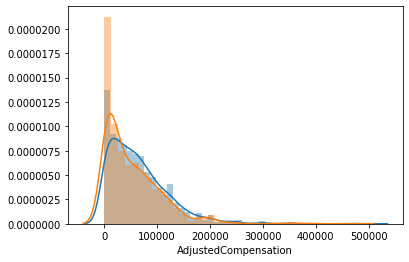

In [15]:

sns.distplot(s1)
sns.distplot(s2)

## Wages and Education II

Now perform a similar statistical test comparing the AdjustedCompensation of those with Bachelor's degrees and those with Doctorates. If you haven't already, be sure to explore the distribution of the AdjustedCompensation feature for any anomalies. 

In [18]:
#Your code here
f1 = "FormalEducation"
f2 = "AdjustedCompensation"
subset = df[(~df[f1].isnull()) & (~df[f2].isnull())]
s1 = subset[subset[f1]=='Doctoral degree'][f2]
s2 = subset[subset[f1]=="Bachelor's degree"][f2]
print(f"Median Values: \ts1: {s1.median()} \ts2: {s2.median()}")
print(f"Mean Values: \ts1: {s1.mean()} \ts2: {s2.mean()}")
print(f"Sample sizes: \ts1: {len(s1)} \ts2: {len(s2)}")
print("Welch's t-test p-valuel", scipy.stats.ttest_ind(s1, s2, equal_var=False))

print('remove outlier')
outlier_threshold = 500000

s1 = subset[(subset['FormalEducation']=="Doctoral degree") & (subset["AdjustedCompensation"]<=outlier_threshold)]["AdjustedCompensation"]
s2 = subset[(subset['FormalEducation']=="Bachelor's degree") & (subset["AdjustedCompensation"]<=outlier_threshold)]["AdjustedCompensation"]

print(f"Median Values: \ts1: {s1.median()} \ts2: {s2.median()}")
print(f"Mean Values: \ts1: {s1.mean()} \ts2: {s2.mean()}")
print(f"Sample sizes: \ts1: {len(s1)} \ts2: {len(s2)}")
print("Welch's t-test p-valuel", scipy.stats.ttest_ind(s1, s2, equal_var=False))

Median Values: 	s1: 74131.91999999997 	s2: 38399.4
Mean Values: 	s1: 29566175.762453098 	s2: 64887.097994618794
Sample sizes: 	s1: 967 	s2: 1107
Welch's t-test p-valuel Ttest_indResult(statistic=1.0081234695549772, pvalue=0.31364763989440514)
remove outlier
Median Values: 	s1: 73152.77 	s2: 38292.15
Mean Values: 	s1: 86194.98163085165 	s2: 53744.35038988486
Sample sizes: 	s1: 964 	s2: 1103
Welch's t-test p-valuel Ttest_indResult(statistic=12.098472655425814, pvalue=1.6387413004630542e-32)


## Wages and Education III

Remember the multiple comparisons problem; rather than continuing on like this, perform an ANOVA test between the various 'FormalEducation' categories and their relation to 'AdjustedCompensation'.

In [ ]:
#Your code here


## Additional Resources

Here's the original source where the data was taken from:  
    [Kaggle Machine Learning & Data Science Survey 2017](https://www.kaggle.com/kaggle/kaggle-survey-2017)

## Summary

In this lab, you practiced conducting actual hypothesis tests on actual data. From this, you saw how dependent results can be on the initial problem formulation, including preprocessing!